In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


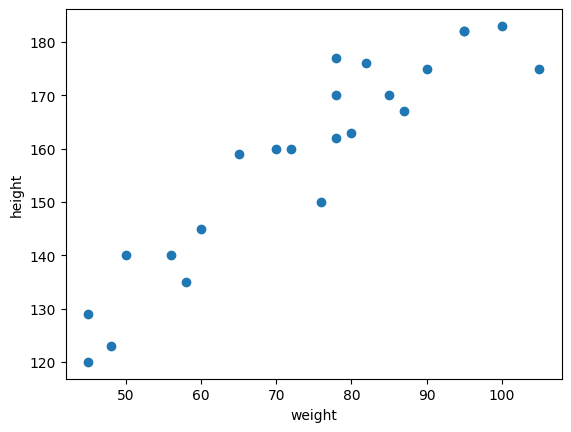

In [4]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [5]:
#divide the data into X, y
X=df[["Weight"]] #independent feature
y = df["Height"] #dependent feature

In [6]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [7]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [8]:
#train test split
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


In [10]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [11]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [12]:
y_train

10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [13]:
y_test

20    129
17    159
3     145
13    183
19    167
16    140
Name: Height, dtype: int64

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17, 1), (17,), (6, 1), (6,))

In [15]:
df.shape

(23, 2)

In [16]:
#Scaling>> standardization >> fit_transform >>tain, transform>>test

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [20]:
#Always perform scaling after train test split
#y/target variable should not be scaled
#avoid scaling categorical features
X_train = scaler.fit_transform(X_train) #for train data use fit_transform
X_test = scaler.transform(X_test) #for test use only transform as it is representative of unknown data>> 

In [21]:
X_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [22]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

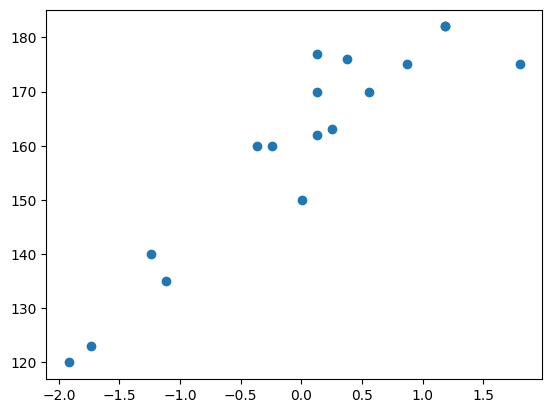

In [23]:
#scaling is optional >> why? it doesn't affect the distribution of data


plt.scatter(X_train, y_train)

In [24]:
#model training
from sklearn.linear_model import LinearRegression

#linear regression parameters:
#fit_intercept >> The best fit line will have intercept, by default it is true
#copy__X >> copy the original X_train and then build the model, dont modify the original data,by default>>true
#n_jobs >> processor you want to use
#positive>> you want all of your coefficient to be positive


#After building the model, you have attributes of the mode
#coef
#intercept

In [25]:
regressor = LinearRegression()

In [26]:
regressor

LinearRegression()

In [27]:
#training of the model
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
print("The slope or coef of model is", regressor.coef_)
print("The intercept of the model is", regressor.intercept_)

The slope or coef of model is [17.7307072]
The intercept of the model is 160.0


# Prediction on train data
#predicted height output = intercept + coef_(weights), y_pred_train = 160.0+17.74*(X_train)

# Prediction on test data
#predicted height output = intercept + coef_(weights) , y_pred_test = 160.0+17.74*(X_test)